In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [388]:
data= pd.read_csv("star_classification.csv")
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


## Data Cleaning and Preprocessing

In [389]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [391]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [392]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [393]:
data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

## Exploratory Data Analysis

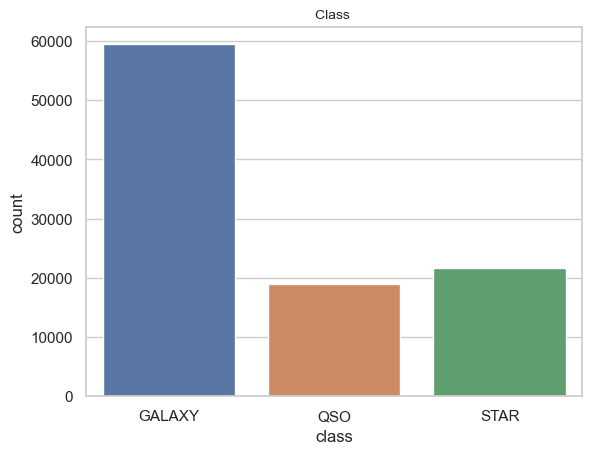

In [394]:
sns.countplot(x = data["class"])
plt.title("Class ",fontsize=10)
plt.show()

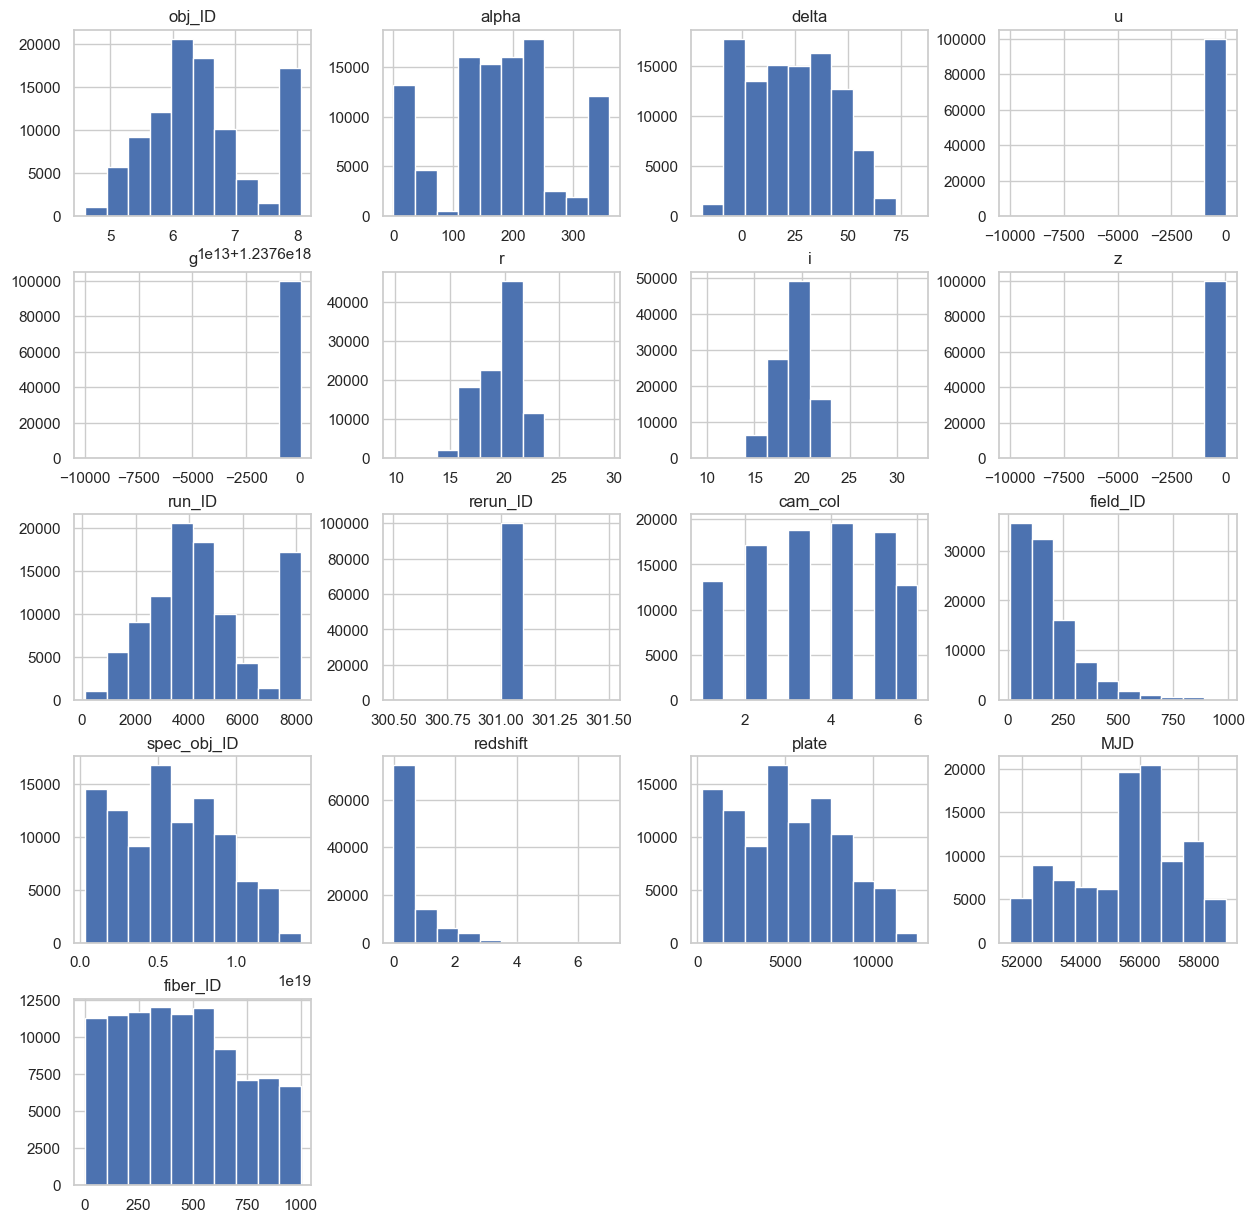

In [395]:
data.hist(figsize=(15,15))
plt.show()

In [396]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

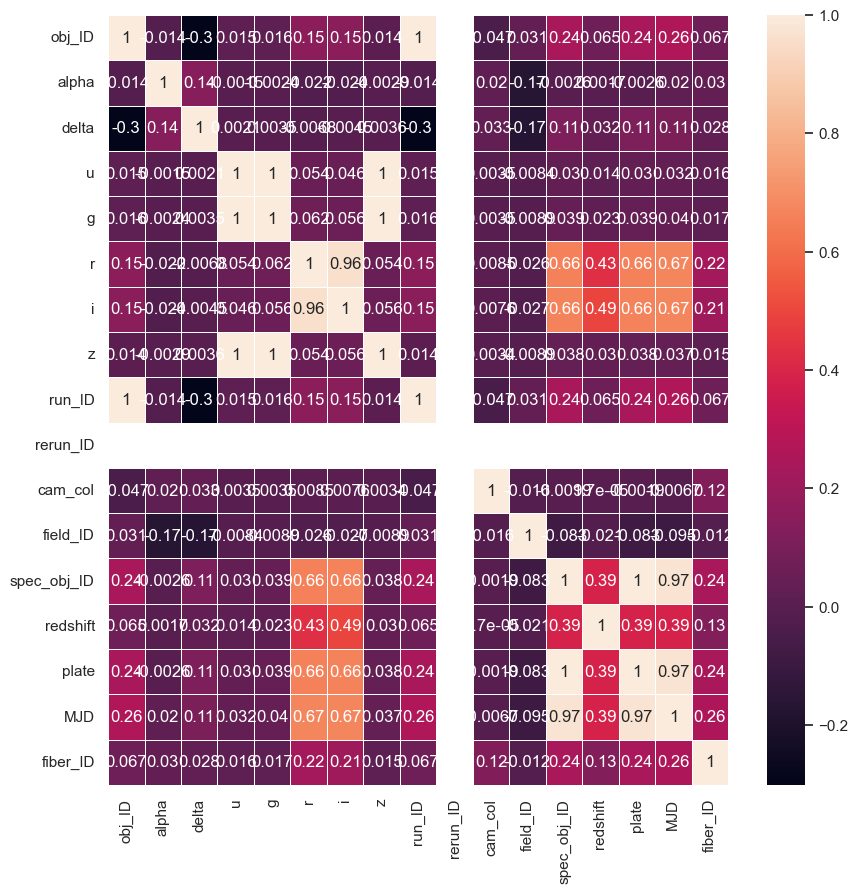

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, ax=ax)
plt.show()

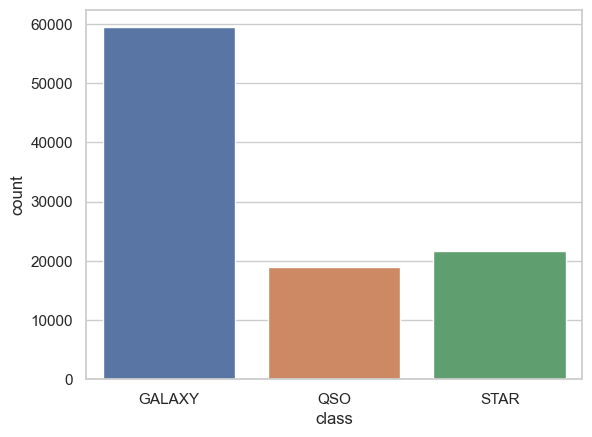

In [398]:
b=sns.countplot(x= 'class' ,data = data )
plt.show()

<AxesSubplot:xlabel='class', ylabel='alpha'>

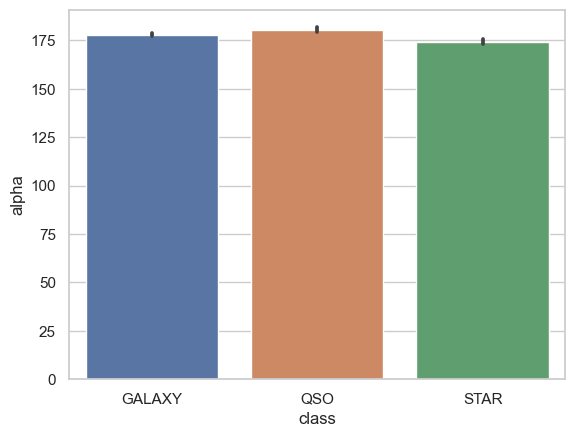

In [399]:
sns.barplot(data=data, x="class", y="alpha")

<AxesSubplot:xlabel='class', ylabel='delta'>

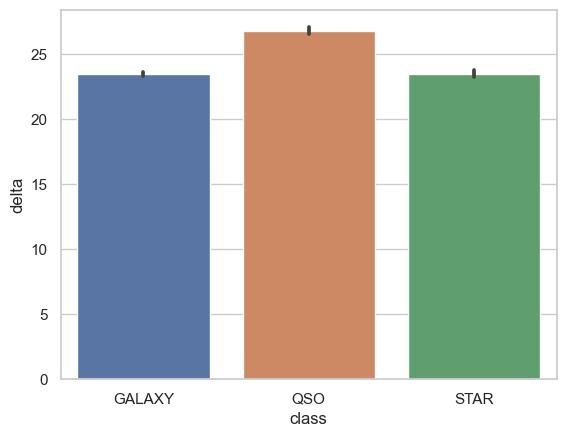

In [400]:
sns.barplot(data=data, x="class", y="delta")

In [401]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='u'>

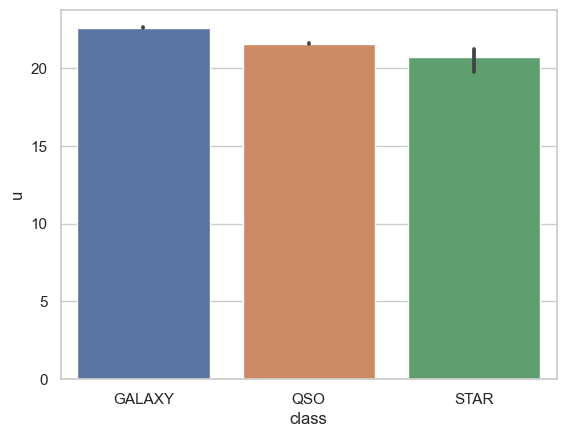

In [402]:
sns.barplot(data=data, x="class", y="u")

<AxesSubplot:xlabel='class', ylabel='g'>

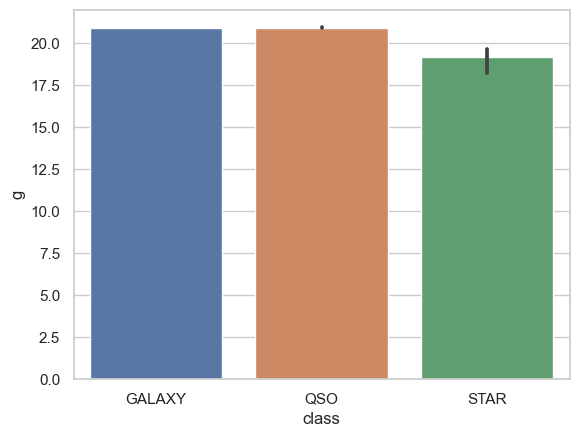

In [403]:
sns.barplot(data=data, x="class", y="g")

<AxesSubplot:xlabel='class', ylabel='r'>

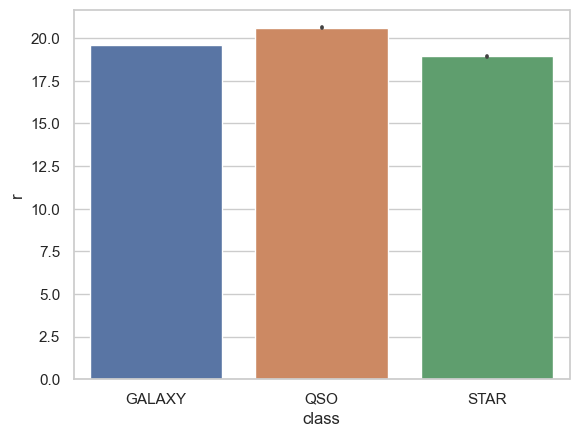

In [404]:
sns.barplot(data=data, x="class", y="r")

<AxesSubplot:xlabel='class', ylabel='i'>

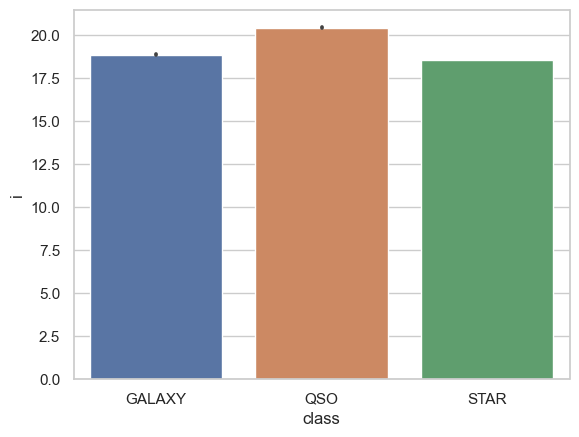

In [405]:
sns.barplot(data=data, x="class", y="i")

<AxesSubplot:xlabel='class', ylabel='z'>

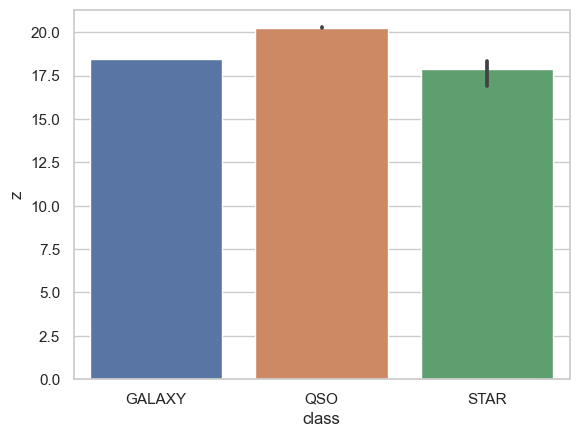

In [406]:
sns.barplot(data=data, x="class", y="z")

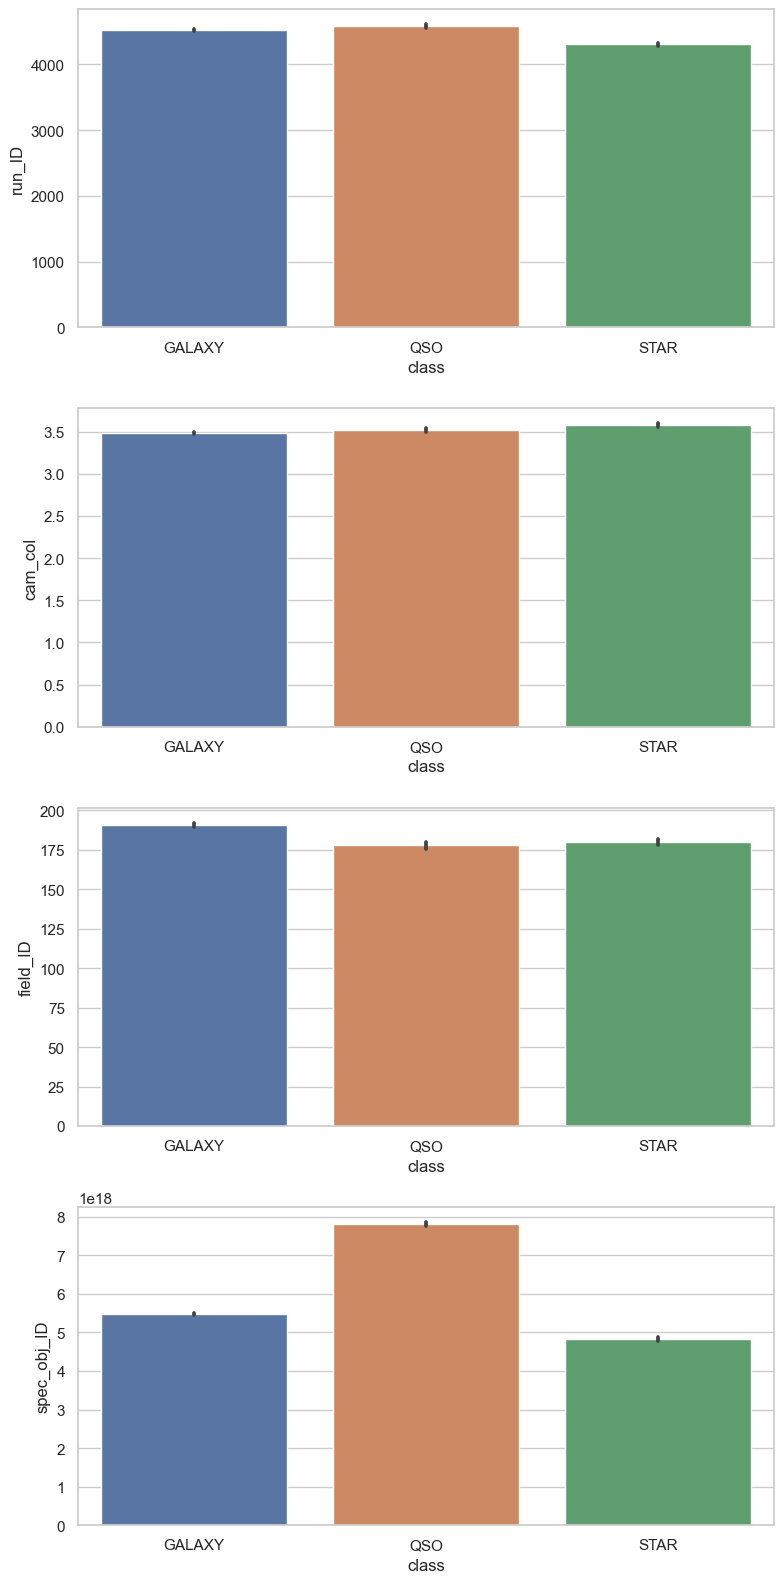

In [407]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(['run_ID',
       'cam_col', 'field_ID', 'spec_obj_ID']), figsize=(8, 16))
for i, column in enumerate(['run_ID',
       'cam_col', 'field_ID', 'spec_obj_ID']):
    ax = axes[i]
    sns.barplot(data=data, x='class', y=column, ax=ax) 
plt.tight_layout()
plt.show()

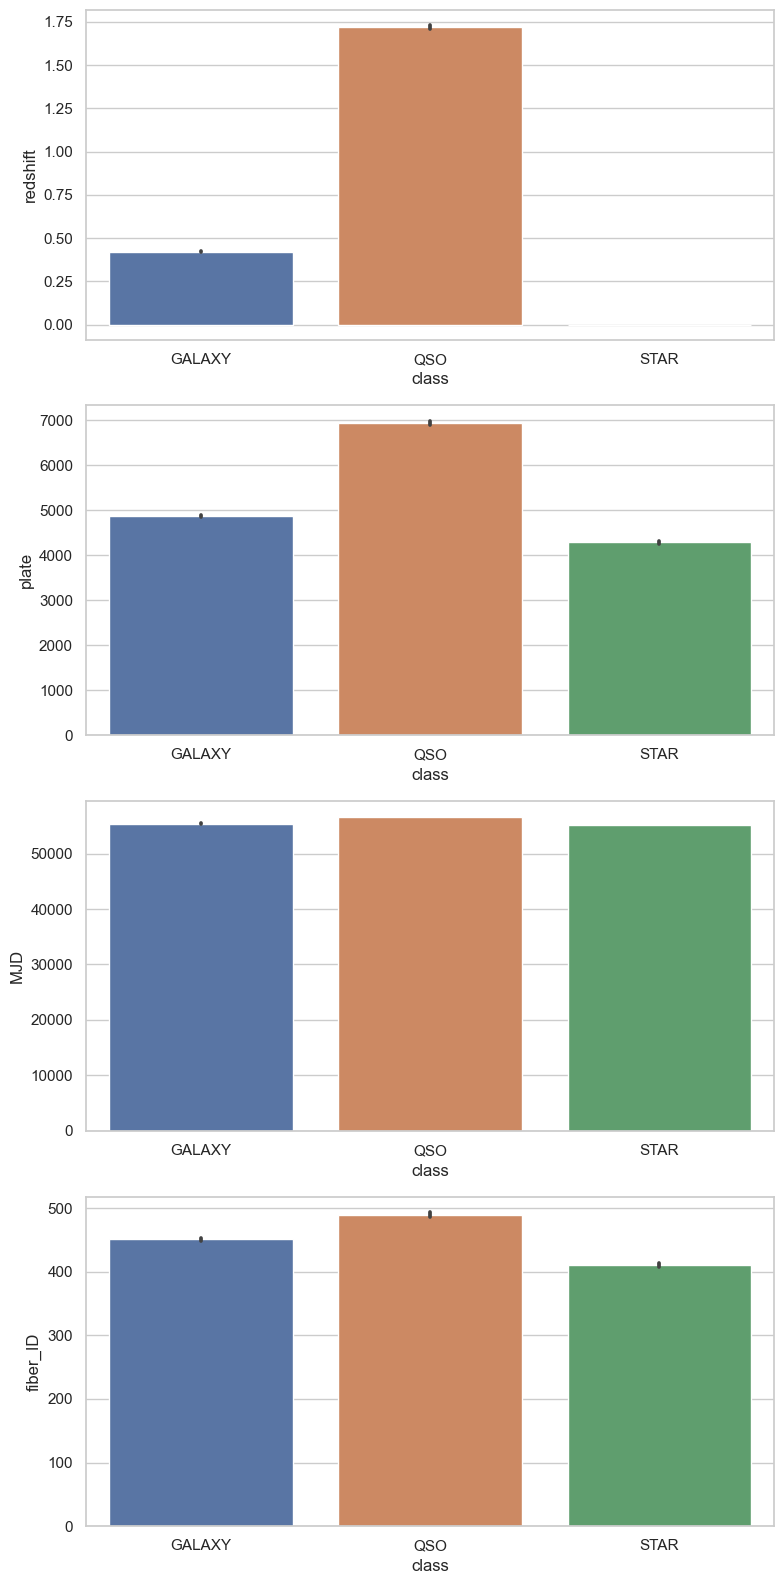

In [408]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(['redshift', 'plate',
       'MJD', 'fiber_ID']), figsize=(8, 16))
for i, column in enumerate(['redshift', 'plate',
       'MJD', 'fiber_ID']):
    ax = axes[i]
    sns.barplot(data=data, x='class', y=column, ax=ax) 
plt.tight_layout()
plt.show()

## Feature Selection

In [409]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [410]:
len(data)

100000

In [411]:
for x in data.columns:
    print( x, " has", data[x].nunique(), " values")

obj_ID  has 78053  values
alpha  has 99999  values
delta  has 99999  values
u  has 93748  values
g  has 92651  values
r  has 91901  values
i  has 92019  values
z  has 92007  values
run_ID  has 430  values
rerun_ID  has 1  values
cam_col  has 6  values
field_ID  has 856  values
spec_obj_ID  has 100000  values
class  has 3  values
redshift  has 99295  values
plate  has 6284  values
MJD  has 2180  values
fiber_ID  has 1000  values


In [412]:
df = data

In [413]:
df.drop(['rerun_ID'], axis=1, inplace=True)

In [414]:
df.obj_ID

0        1.237661e+18
1        1.237665e+18
2        1.237661e+18
3        1.237663e+18
4        1.237680e+18
             ...     
99995    1.237679e+18
99996    1.237679e+18
99997    1.237668e+18
99998    1.237661e+18
99999    1.237661e+18
Name: obj_ID, Length: 100000, dtype: float64

In [415]:
df.duplicated().unique()

array([False])

In [416]:
df.drop(['obj_ID'], axis=1, inplace=True)

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   alpha        100000 non-null  float64
 1   delta        100000 non-null  float64
 2   u            100000 non-null  float64
 3   g            100000 non-null  float64
 4   r            100000 non-null  float64
 5   i            100000 non-null  float64
 6   z            100000 non-null  float64
 7   run_ID       100000 non-null  int64  
 8   cam_col      100000 non-null  int64  
 9   field_ID     100000 non-null  int64  
 10  spec_obj_ID  100000 non-null  float64
 11  class        100000 non-null  object 
 12  redshift     100000 non-null  float64
 13  plate        100000 non-null  int64  
 14  MJD          100000 non-null  int64  
 15  fiber_ID     100000 non-null  int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 12.2+ MB


In [418]:
df.drop(['run_ID','field_ID','spec_obj_ID','fiber_ID'],axis=1, inplace=True)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   cam_col   100000 non-null  int64  
 8   class     100000 non-null  object 
 9   redshift  100000 non-null  float64
 10  plate     100000 non-null  int64  
 11  MJD       100000 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 9.2+ MB


In [420]:
df.describe()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,3.511610,0.576661,5137.009660,55588.647500
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1.586912,0.730707,2952.303351,1808.484233
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,1.000000,-0.009971,266.000000,51608.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,2.000000,0.054517,2526.000000,54234.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4.000000,0.424173,4987.000000,55868.500000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5.000000,0.704154,7400.250000,56777.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,6.000000,7.011245,12547.000000,58932.000000


In [421]:
df.cam_col.value_counts()

4    19573
3    18851
5    18537
2    17117
1    13227
6    12695
Name: cam_col, dtype: int64

In [422]:
df.plate.nunique()

6284

In [423]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [424]:
df[df['class']=='GALAXY']['plate'].mean()

4869.375607704601

In [425]:
df[df['class']=='QSO']['plate'].mean()

6943.071620695111

In [426]:
df[df['class']=='STAR']['plate'].mean()

4287.920348244883

In [427]:
df.MJD.nunique()

2180

In [428]:
df[df['class']=='STAR']['MJD'].mean(), df[df['class']=='STAR']['MJD'].sum()

(55131.14911549504, 1190502034)

In [429]:
df[df['class']=='QSO']['MJD'].mean(),df[df['class']=='QSO']['MJD'].sum()

(56627.54717578187, 1073714922)

In [430]:
df[df['class']=='GALAXY']['MJD'].mean(), df[df['class']=='GALAXY']['MJD'].sum()

(55423.463605013036, 3294647794)

In [431]:
df.drop(['MJD'], axis=1, inplace=True)

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   cam_col   100000 non-null  int64  
 8   class     100000 non-null  object 
 9   redshift  100000 non-null  float64
 10  plate     100000 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 8.4+ MB


In [433]:
X = df.drop(['class'], axis=1 )
y = df['class']

In [434]:
# Encoding the data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(y)

In [435]:
# Scaling Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [436]:
# Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [437]:
X_train.shape, y_train.shape

((70000, 10), (70000,))

In [438]:
X_test.shape, y_test.shape

((30000, 10), (30000,))

## Model Training

### Logistic Regression

In [439]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,y_train)

print("Training Score: ", lr_classifier.score(X_train,y_train))
print("Testing Score: ", lr_classifier.score(X_test,y_test))

lr_pred = lr_classifier.predict(X_test)

Training Score:  0.9563285714285714
Testing Score:  0.9544333333333334


### SVM Classifier

In [440]:
from sklearn.svm import SVC,LinearSVC

svc_linear_classifier = LinearSVC()
svc_linear_classifier.fit(X_train,y_train)

print("Training Score: ", svc_linear_classifier.score(X_train,y_train))
print("Testing Score: ", svc_linear_classifier.score(X_test,y_test))

svc_linear_pred = svc_linear_classifier.predict(X_test)

Training Score:  0.9403714285714285
Testing Score:  0.9388666666666666


In [441]:
svc_rbf_classifier = SVC(kernel="rbf")
svc_rbf_classifier.fit(X_train,y_train)

print("Training Score: ", svc_rbf_classifier.score(X_train,y_train))
print("Testing Score: ", svc_rbf_classifier.score(X_test,y_test))

svc_rbf_pred = svc_rbf_classifier.predict(X_test)

Training Score:  0.9613285714285714
Testing Score:  0.9607


### Decision Tree Classifier

In [442]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth = 10)
dt_classifier.fit(X_train,y_train)

print("Training Score: ", dt_classifier.score(X_train,y_train))
print("Testing Score: ", dt_classifier.score(X_test,y_test))

dt_pred = dt_classifier.predict(X_test)


Training Score:  0.9842428571428572
Testing Score:  0.9742333333333333


### Random Forest 

In [443]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100,max_depth = 10)
rf_classifier.fit(X_train,y_train)

print("Training Score: ", rf_classifier.score(X_train,y_train))
print("Testing Score: ", rf_classifier.score(X_test,y_test))

rf_pred = rf_classifier.predict(X_test)

Training Score:  0.9825714285714285
Testing Score:  0.9772


### K Neighbours

In [444]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 7)
knn_classifier.fit(X_train,y_train)

print("Training Score: ", knn_classifier.score(X_train,y_train))
print("Testing Score: ", knn_classifier.score(X_test,y_test))

knn_pred = knn_classifier.predict(X_test)

Training Score:  0.9382
Testing Score:  0.9249333333333334


### Voting Classifier

In [445]:
from sklearn.ensemble import VotingClassifier
vt_classifier = VotingClassifier(estimators = [('dt', DecisionTreeClassifier(max_depth = 10)),
                                               ('knn', KNeighborsClassifier(n_neighbors = 7)),
                                               ('svm', LinearSVC()),
                                               ('lr', LogisticRegression()),
                                               ('rf', RandomForestClassifier(n_estimators = 100,max_depth = 10))], voting = 'hard')

vt_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=10)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svm', LinearSVC()), ('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(max_depth=10))])

In [446]:
print("Training Score: ", vt_classifier.score(X_train,y_train))
print("Testing Score: ", vt_classifier.score(X_test,y_test))

vt_pred = vt_classifier.predict(X_test)

Training Score:  0.9748285714285714
Testing Score:  0.9707666666666667


### Stacking Classifier

In [447]:
from sklearn.ensemble import StackingClassifier

st_classifier = StackingClassifier(estimators = [('dt', DecisionTreeClassifier(max_depth = 10)),
                                               ('knn', KNeighborsClassifier(n_neighbors = 7)),
                                               ('svm', LinearSVC()),
                                               ('lr', LogisticRegression()),
                                               ('rf', RandomForestClassifier(n_estimators = 100,max_depth = 10))])

st_classifier.fit(X_train, y_train)
print("Training Score: ", st_classifier.score(X_train,y_train))
print("Testing Score: ", st_classifier.score(X_test,y_test))

st_pred = st_classifier.predict(X_test)

Training Score:  0.9842285714285715
Testing Score:  0.9783333333333334


### Bagging 

In [448]:
from sklearn.ensemble import BaggingClassifier

bg_classifier = BaggingClassifier(n_estimators=10).fit(X, y)
bg_classifier.fit(X_train, y_train)
print("Training Score: ", bg_classifier.score(X_train,y_train))
print("Testing Score: ", bg_classifier.score(X_test,y_test))

bg_pred = bg_classifier.predict(X_test)

Training Score:  0.9972428571428571
Testing Score:  0.9781


### Gradient Boosting Classifier

In [449]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb_classifier.fit(X_train, y_train)
print("Training Score: ", gb_classifier.score(X_train,y_train))
print("Testing Score: ", gb_classifier.score(X_test,y_test))

gb_pred = gb_classifier.predict(X_test)

Training Score:  0.9763857142857143
Testing Score:  0.9752666666666666


### XGBoost Classifier

In [450]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)
xgb_classifier.fit(X_train, y_train)

print("Training Score: ", xgb_classifier.score(X_train,y_train))
print("Testing Score: ", xgb_classifier.score(X_test,y_test))

xgb_pred = xgb_classifier.predict(X_test)

Training Score:  0.9790428571428571
Testing Score:  0.9777333333333333


### LightGBM Classifier

In [451]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)
lgbm_classifier.fit(X_train, y_train)

print("Training Score: ", lgbm_classifier.score(X_train,y_train))
print("Testing Score: ", lgbm_classifier.score(X_test,y_test))

lgbm_pred = lgbm_classifier.predict(X_test)


Training Score:  0.9793142857142857
Testing Score:  0.9774666666666667


### AdaBoost Classifier

In [452]:
from sklearn.ensemble import AdaBoostClassifier

ad_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 8), n_estimators = 50)
ad_classifier.fit(X_train, y_train)
print("Training Score: ", ad_classifier.score(X_train,y_train))
print("Testing Score: ", ad_classifier.score(X_test,y_test))

ada_pred = ad_classifier.predict(X_test)

Training Score:  0.9874285714285714
Testing Score:  0.9633333333333334


## Comparing Confusion Matrix and other classification evaluation metrics

In [453]:
df['class'].head(10), y[:10]

(0    GALAXY
 1    GALAXY
 2    GALAXY
 3    GALAXY
 4    GALAXY
 5       QSO
 6       QSO
 7    GALAXY
 8    GALAXY
 9      STAR
 Name: class, dtype: object,
 array([0, 0, 0, 0, 0, 1, 1, 0, 0, 2]))

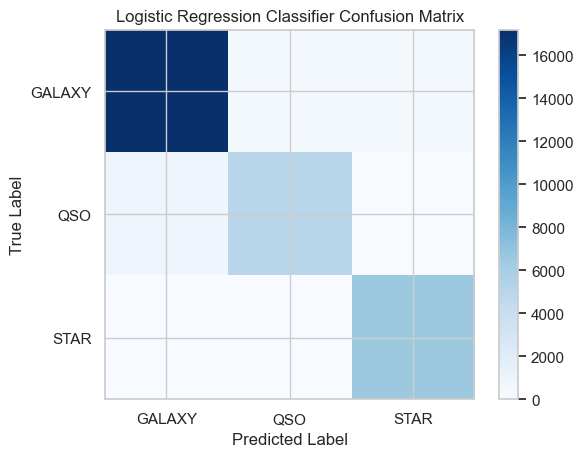

In [454]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, lr_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Classifier Confusion Matrix')
plt.show()

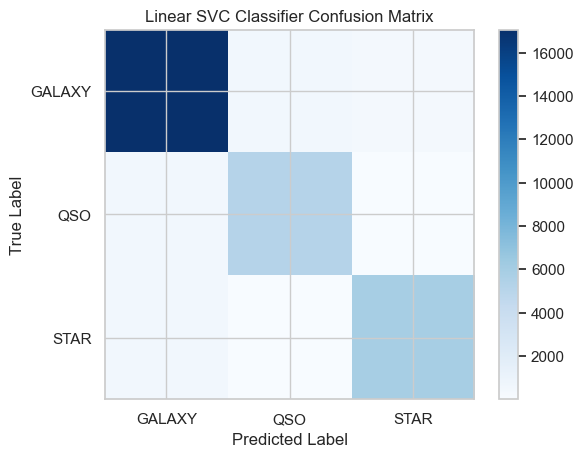

In [455]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, svc_linear_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Linear SVC Classifier Confusion Matrix')
plt.show()

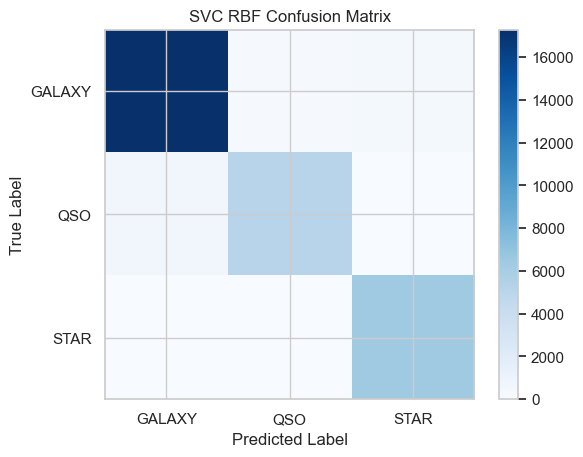

In [456]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, svc_rbf_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVC RBF Confusion Matrix')
plt.show()

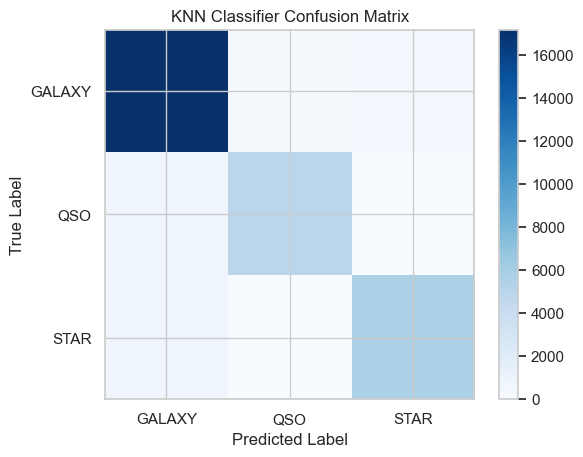

In [457]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, knn_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Classifier Confusion Matrix')
plt.show()

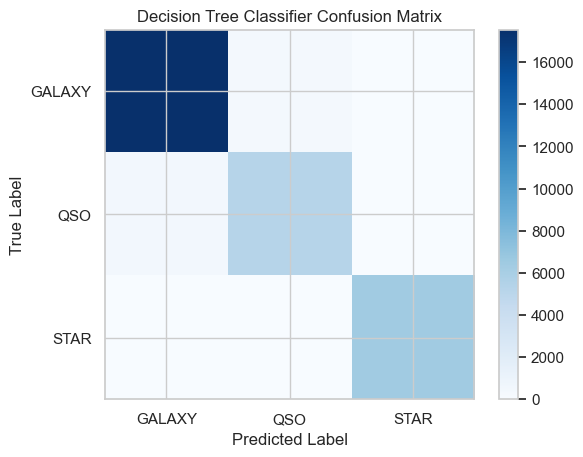

In [458]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, dt_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

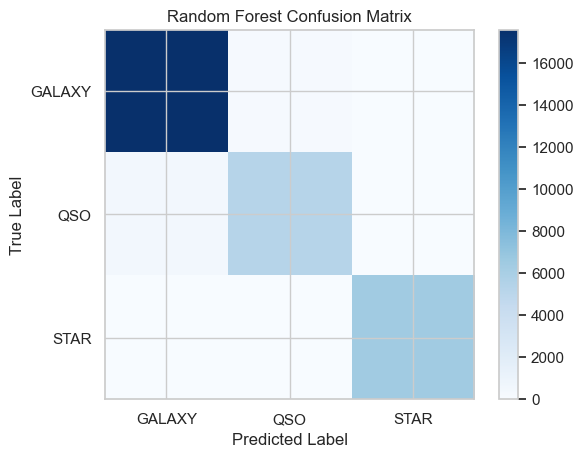

In [459]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, rf_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

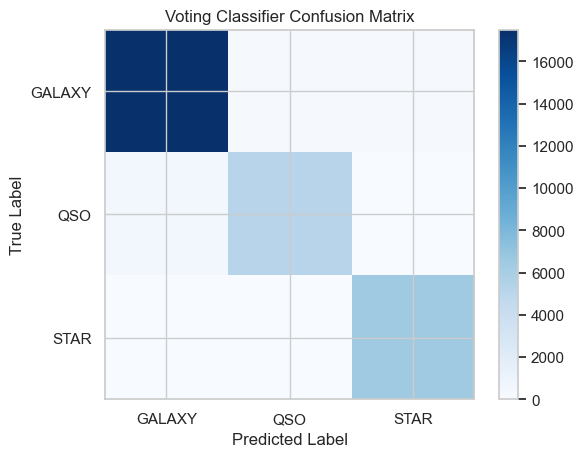

In [460]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, vt_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Voting Classifier Confusion Matrix')
plt.show()

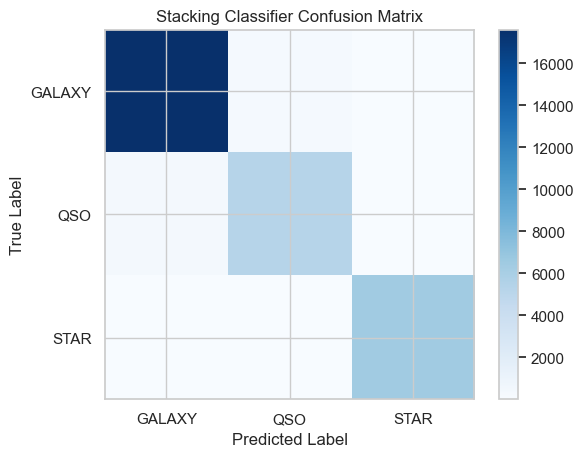

In [461]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, st_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Stacking Classifier Confusion Matrix')
plt.show()

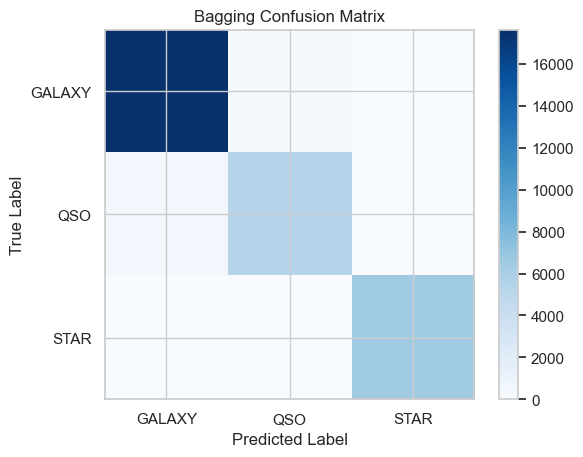

In [462]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, bg_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bagging Confusion Matrix')
plt.show()

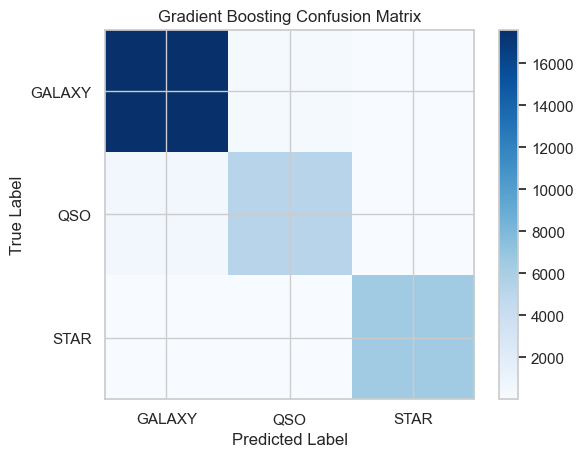

In [463]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, gb_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

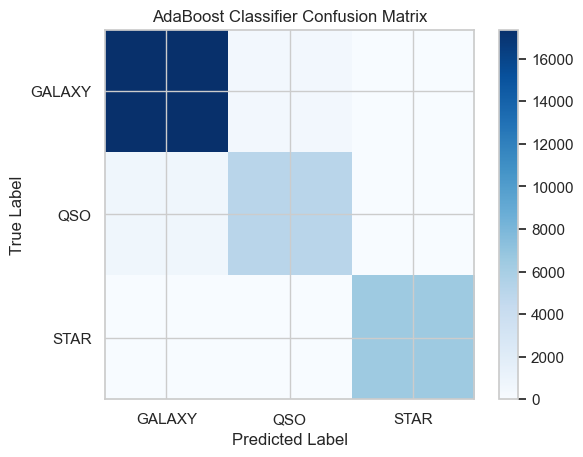

In [464]:
confusion_mat = confusion_matrix(y_test, ada_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('AdaBoost Classifier Confusion Matrix')
plt.show()

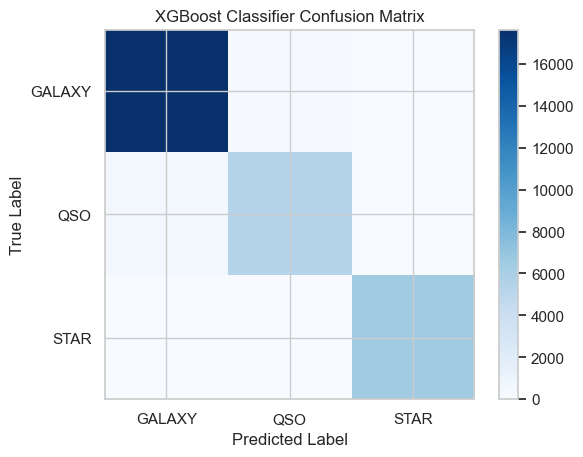

In [465]:
confusion_mat = confusion_matrix(y_test, xgb_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Classifier Confusion Matrix')
plt.show()

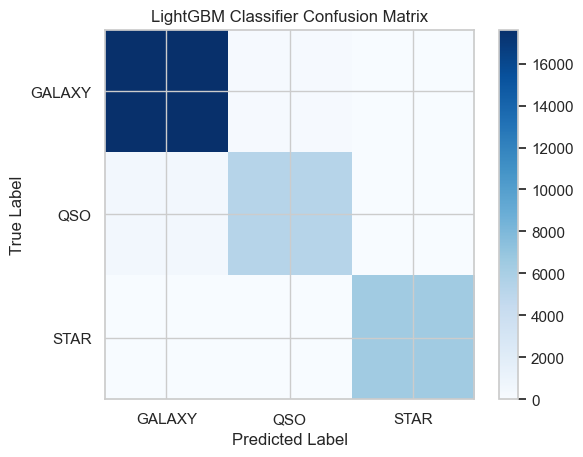

In [466]:
confusion_mat = confusion_matrix(y_test, lgbm_pred)

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.yticks([0, 1, 2], ['GALAXY', 'QSO', 'STAR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LightGBM Classifier Confusion Matrix')
plt.show()

### Accuracy

In [467]:
from sklearn.metrics import accuracy_score

print('accuracy for Logistic Regression Classifier =',accuracy_score(y_test, lr_pred))
print('accuracy for Linear SVC Classifier =',accuracy_score(y_test, svc_linear_pred))
print('accuracy for SVC RBF Classifier =',accuracy_score(y_test, svc_rbf_pred))
print('accuracy for KNeighbours Classifier =',accuracy_score(y_test, knn_pred))
print('accuracy for Decision Tree Classifier =',accuracy_score(y_test, dt_pred))
print('accuracy for Random Forest Classifier =',accuracy_score(y_test, rf_pred))
print('accuracy for Voting Classifier =',accuracy_score(y_test, vt_pred))
print('accuracy for Stacking Classifier =',accuracy_score(y_test, st_pred))
print('accuracy for Bagging Classifier =',accuracy_score(y_test, bg_pred))
print('accuracy for Gradient Boosting Classifier =',accuracy_score(y_test, gb_pred))
print('accuracy for XGBoost Classifier =',accuracy_score(y_test, xgb_pred))
print('accuracy for LightGBM Classifier =',accuracy_score(y_test, lgbm_pred))
print('accuracy for AdaBoost Classifier =',accuracy_score(y_test, ada_pred))

accuracy for Logistic Regression Classifier = 0.9544333333333334
accuracy for Linear SVC Classifier = 0.9388666666666666
accuracy for SVC RBF Classifier = 0.9607
accuracy for KNeighbours Classifier = 0.9249333333333334
accuracy for Decision Tree Classifier = 0.9742333333333333
accuracy for Random Forest Classifier = 0.9772
accuracy for Voting Classifier = 0.9707666666666667
accuracy for Stacking Classifier = 0.9783333333333334
accuracy for Bagging Classifier = 0.9781
accuracy for Gradient Boosting Classifier = 0.9752666666666666
accuracy for XGBoost Classifier = 0.9777333333333333
accuracy for LightGBM Classifier = 0.9774666666666667
accuracy for AdaBoost Classifier = 0.9633333333333334


### Precision

In [468]:
from sklearn.metrics import precision_score

print('precision for Logistic Regression Classifier =',precision_score(y_test, lr_pred, average='macro'))
print('precision for Linear SVC Classifier =',precision_score(y_test, svc_linear_pred, average='macro'))
print('precision for SVC RBF Classifier =',precision_score(y_test, svc_rbf_pred, average='macro'))
print('precision for KNeighbours Classifier =',precision_score(y_test, knn_pred, average='macro'))
print('precision for Decision Tree Classifier =',precision_score(y_test, dt_pred, average='macro'))
print('precision for Random Forest Classifier =',precision_score(y_test, rf_pred, average='macro'))
print('precision for Voting Classifier =',precision_score(y_test, vt_pred, average='macro'))
print('precision for Stacking Classifier =',precision_score(y_test, st_pred, average='macro'))
print('precision for Bagging Classifier =',precision_score(y_test, bg_pred, average='macro'))
print('precision for Gradient Boosting Classifier =',precision_score(y_test, gb_pred, average='macro'))
print('precision for XGBoost Classifier =',precision_score(y_test, xgb_pred, average='macro'))
print('precision for LightGBM Classifier =',precision_score(y_test, lgbm_pred, average='macro'))
print('precision for AdaBoost Classifier =',precision_score(y_test, ada_pred, average='macro'))

precision for Logistic Regression Classifier = 0.9505856258712759
precision for Linear SVC Classifier = 0.935792604274468
precision for SVC RBF Classifier = 0.9584489043395804
precision for KNeighbours Classifier = 0.9327764966274552
precision for Decision Tree Classifier = 0.9731792411669019
precision for Random Forest Classifier = 0.9774927171350153
precision for Voting Classifier = 0.9703883558876251
precision for Stacking Classifier = 0.9781239325074353
precision for Bagging Classifier = 0.9791118042657058
precision for Gradient Boosting Classifier = 0.9760215159912765
precision for XGBoost Classifier = 0.9787924854567672
precision for LightGBM Classifier = 0.9780821419619249
precision for AdaBoost Classifier = 0.9597351781895043


### Recall

In [469]:
from sklearn.metrics import recall_score

print('Recall for Logistic Regression Classifier =',recall_score(y_test, lr_pred, average='macro'))
print('Recall for Linear SVC Classifier =',recall_score(y_test, svc_linear_pred, average='macro'))
print('Recall for SVC RBF Classifier =',recall_score(y_test, svc_rbf_pred, average='macro'))
print('Recall for KNeighbours Classifier =',recall_score(y_test, knn_pred, average='macro'))
print('Recall for Decision Tree Classifier =',recall_score(y_test, dt_pred, average='macro'))
print('Recall for Random Forest Classifier =',recall_score(y_test, rf_pred, average='macro'))
print('Recall for Voting Classifier =',recall_score(y_test, vt_pred, average='macro'))
print('Recall for Stacking Classifier =',recall_score(y_test, st_pred, average='macro'))
print('Recall for Bagging Classifier =',recall_score(y_test, bg_pred, average='macro'))
print('Recall for Gradient Boosting Classifier =',recall_score(y_test, gb_pred, average='macro'))
print('Recall for XGBoost Classifier =',recall_score(y_test, xgb_pred, average='macro'))
print('Recall for LightGBM Classifier =',recall_score(y_test, lgbm_pred, average='macro'))
print('Recall for AdaBoost Classifier =',recall_score(y_test, ada_pred, average='macro'))


Recall for Logistic Regression Classifier = 0.9459229855421186
Recall for Linear SVC Classifier = 0.9277032941031181
Recall for SVC RBF Classifier = 0.9534165610807149
Recall for KNeighbours Classifier = 0.899763743478995
Recall for Decision Tree Classifier = 0.9670369711569385
Recall for Random Forest Classifier = 0.9697976802037589
Recall for Voting Classifier = 0.9625639071995858
Recall for Stacking Classifier = 0.9715484230102249
Recall for Bagging Classifier = 0.9699780215665492
Recall for Gradient Boosting Classifier = 0.9664207869848469
Recall for XGBoost Classifier = 0.9693733071822171
Recall for LightGBM Classifier = 0.9695037130718606
Recall for AdaBoost Classifier = 0.9549028335793994


### F1-score

In [470]:
from sklearn.metrics import f1_score

print('F1 score for Logistic Regression Classifier =', f1_score(y_test, lr_pred, average='macro'))
print('F1 score for Linear SVC Classifier =', f1_score(y_test, svc_linear_pred, average='macro'))
print('F1 score for SVC RBF Classifier =', f1_score(y_test, svc_rbf_pred, average='macro'))
print('F1 score for KNeighbours Classifier =', f1_score(y_test, knn_pred, average='macro'))
print('F1 score for Decision Tree Classifier =', f1_score(y_test, dt_pred, average='macro'))
print('F1 score for Random Forest Classifier =', f1_score(y_test, rf_pred, average='macro'))
print('F1 score for Voting Classifier =', f1_score(y_test, vt_pred, average='macro'))
print('F1 score for Stacking Classifier =', f1_score(y_test, st_pred, average='macro'))
print('F1 score for Bagging Classifier =', f1_score(y_test, bg_pred, average='macro'))
print('F1 score for Gradient Boosting Classifier =', f1_score(y_test, gb_pred, average='macro'))
print('F1 score for XGBoost Classifier =', f1_score(y_test, xgb_pred, average='macro'))
print('F1 score for LightGBM Classifier =', f1_score(y_test, lgbm_pred, average='macro'))
print('F1 score for AdaBoost Classifier =', f1_score(y_test, ada_pred, average='macro'))


F1 score for Logistic Regression Classifier = 0.9475354853893584
F1 score for Linear SVC Classifier = 0.9316031953010818
F1 score for SVC RBF Classifier = 0.9552914349872453
F1 score for KNeighbours Classifier = 0.9148218189608294
F1 score for Decision Tree Classifier = 0.9700243791935631
F1 score for Random Forest Classifier = 0.9734565349501656
F1 score for Voting Classifier = 0.9661232355981634
F1 score for Stacking Classifier = 0.9747332193847641
F1 score for Bagging Classifier = 0.974363884468998
F1 score for Gradient Boosting Classifier = 0.9710177288815446
F1 score for XGBoost Classifier = 0.9738845651261806
F1 score for LightGBM Classifier = 0.9736277773401484
F1 score for AdaBoost Classifier = 0.9572445981817955


In [471]:
from sklearn.metrics import classification_report

print('Classification Report for Logistic Regression Classifier:')
print(classification_report(y_test, lr_pred))

print('Classification Report for Linear SVC Classifier:')
print(classification_report(y_test, svc_linear_pred))

print('Classification Report for SVC RBF Classifier:')
print(classification_report(y_test, svc_rbf_pred))

print('Classification Report for KNeighbours Classifier:')
print(classification_report(y_test, knn_pred))

print('Classification Report for Decision Tree Classifier:')
print(classification_report(y_test, dt_pred))

print('Classification Report for Random Forest Classifier:')
print(classification_report(y_test, rf_pred))

print('Classification Report for Voting Classifier:')
print(classification_report(y_test, vt_pred))

print('Classification Report for Stacking Classifier:')
print(classification_report(y_test, st_pred))

print('Classification Report for Bagging Classifier:')
print(classification_report(y_test, bg_pred))

print('Classification Report for Gradient Boosting Classifier:')
print(classification_report(y_test, gb_pred))

print('Classification Report for XGBoost Classifier:')
print(classification_report(y_test, xgb_pred))

print('Classification Report for LightGBM Classifier:')
print(classification_report(y_test, lgbm_pred))

print('Classification Report for AdaBoost Classifier:')
print(classification_report(y_test, ada_pred))


Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17845
           1       0.95      0.87      0.91      5700
           2       0.95      1.00      0.97      6455

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000

Classification Report for Linear SVC Classifier:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17845
           1       0.91      0.91      0.91      5700
           2       0.96      0.92      0.94      6455

    accuracy                           0.94     30000
   macro avg       0.94      0.93      0.93     30000
weighted avg       0.94      0.94      0.94     30000

Classification Report for SVC RBF Classifier:
              precision    recall  f1-score   support

           0       0.97      0